Given the volatility of cryptocurrencies, this research seeks to understand if swing trade XRP* will be possible by observing trends of long term as well as short term trade prices of XRP. Then use these characteristics to predict when to buy and sell XRP using classification techniques. (Since the end results are specific actions such as "Buy", Classification techniques will be used rather than Regression)

The data of XRP trade history (of 1-minute intervals) will be taken from the exchange:


* what is XRP: https://en.wikipedia.org/wiki/Ripple_(payment_protocol)

## Import things 

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + 'D:/LatexPackage/miktex/bin/x64'

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np

import matplotlib.pyplot as plt

import datetime as dt

from datetime import datetime

import numpy as np

import pandas as pd
import urllib.request
     

from IPython.display import clear_output

# Starting of analysis

### Get 1min XRP data

In [4]:
XRP_USD_1min_path = 'D:\Database\Bitfinex-historical-data-master\Bitfinex-historical-data-master\XRPUSD\Candles_1m'

In [5]:
header_format = ['timestamp_UTC_millisec',
'open_price',
'close_price',
'highest_price',
'lowest_price',
'volume']

In [6]:
xrp_2018_full = pd.read_csv(XRP_USD_1min_path + '/2018/merged.csv', header=None)

In [7]:
xrp_2019_until_Oct = pd.read_csv(XRP_USD_1min_path + '/2019/merged.csv', header=None)

In [8]:
xrp_2018_full.columns = header_format

In [9]:
xrp_2019_until_Oct.columns = header_format

In [10]:
xrp_2018_onwards = pd.concat([xrp_2018_full, xrp_2019_until_Oct])

In [11]:
XRP_Data = xrp_2018_onwards[xrp_2018_onwards['timestamp_UTC_millisec'] >= 1534287600000]

In [12]:
XRP_Data['datetime_real'] = XRP_Data['timestamp_UTC_millisec'].apply(lambda x: datetime.utcfromtimestamp(x/1000))

In [13]:
len(XRP_Data)

564561

In [14]:
XRP_Data['datetime_real'].min()

Timestamp('2018-08-14 23:00:00')

In [15]:
XRP_Data['datetime_real'].max()

Timestamp('2019-11-01 15:59:00')

In [16]:
(XRP_Data['datetime_real'].max() - XRP_Data['datetime_real'].min())

Timedelta('443 days 16:59:00')

In [17]:
XRP_Data['checking_timestamp_UTC_millisec'] = XRP_Data['timestamp_UTC_millisec'].shift(-1)

In [18]:
XRP_Data['dif'] = XRP_Data['checking_timestamp_UTC_millisec'] - XRP_Data['timestamp_UTC_millisec']

In [19]:
XRP_Data_resample_1min_ffill = XRP_Data.set_index('datetime_real').resample('1T').ffill()

In [20]:
XRP_Data_resample_1min_ffill['checking_timestamp_UTC_millisec'] = XRP_Data_resample_1min_ffill['timestamp_UTC_millisec'].shift(-1)

In [21]:
XRP_Data_resample_1min_ffill['dif'] = XRP_Data_resample_1min_ffill['checking_timestamp_UTC_millisec'] - XRP_Data_resample_1min_ffill['timestamp_UTC_millisec']

In [22]:
XRP_Data_resample_1min_ffill['timestamp_UTC'] = XRP_Data_resample_1min_ffill['timestamp_UTC_millisec']/1000

In [23]:
XRP_Data_resample_1min_ffill.head()

,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
datetime_real,,,,,,,,,
2018-08-14 23:00:00,1534287600000,0.26444,0.26427,0.26448,0.26427,21493.134691,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:01:00,1534287660000,0.26410,0.26408,0.26418,0.26408,6316.950507,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:02:00,1534287720000,0.26419,0.26429,0.26429,0.26390,15876.859198,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:03:00,1534287780000,0.26389,0.26359,0.26389,0.26359,15102.000000,1.534288e+12,60000.0,1.534288e+09
2018-08-14 23:04:00,1534287840000,0.26368,0.26359,0.26379,0.26359,6305.473357,1.534288e+12,60000.0,1.534288e+09


#### rough check on data

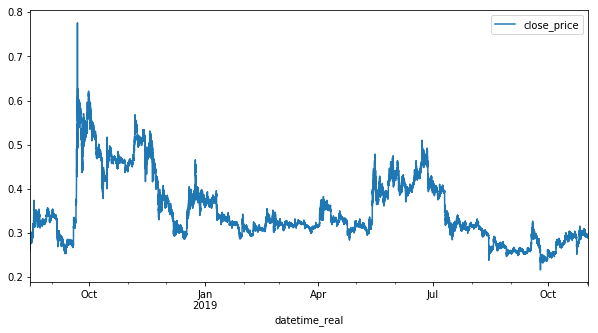

In [24]:
XRP_Data_resample_1min_ffill[['close_price']].plot(figsize = (10,5))

In [25]:
XRP_Data_resample_1min_ffill.tail(10)

,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
datetime_real,,,,,,,,,
2019-11-01 15:50:00,1572623400000,0.29032,0.29029,0.29032,0.29029,18977.229740,1.572623e+12,60000.0,1.572623e+09
2019-11-01 15:51:00,1572623460000,0.29034,0.29030,0.29035,0.29030,11583.433064,1.572624e+12,60000.0,1.572623e+09
2019-11-01 15:52:00,1572623520000,0.29070,0.29046,0.29071,0.29046,205.000000,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:53:00,1572623580000,0.29058,0.29077,0.29077,0.29046,20164.038042,1.572624e+12,0.0,1.572624e+09
2019-11-01 15:54:00,1572623580000,0.29058,0.29077,0.29077,0.29046,20164.038042,1.572624e+12,120000.0,1.572624e+09
2019-11-01 15:55:00,1572623700000,0.29083,0.29173,0.29173,0.29083,1570.393827,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:56:00,1572623760000,0.29161,0.29150,0.29161,0.29120,4022.034331,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:57:00,1572623820000,0.29180,0.29154,0.29207,0.29154,6854.915950,1.572624e+12,60000.0,1.572624e+09
2019-11-01 15:58:00,1572623880000,0.29139,0.29030,0.29151,0.29030,8296.541362,1.572624e+12,60000.0,1.572624e+09



 selecting '2018-08-15 00:00:00' as the starting time as it bypasses the past crypto rush


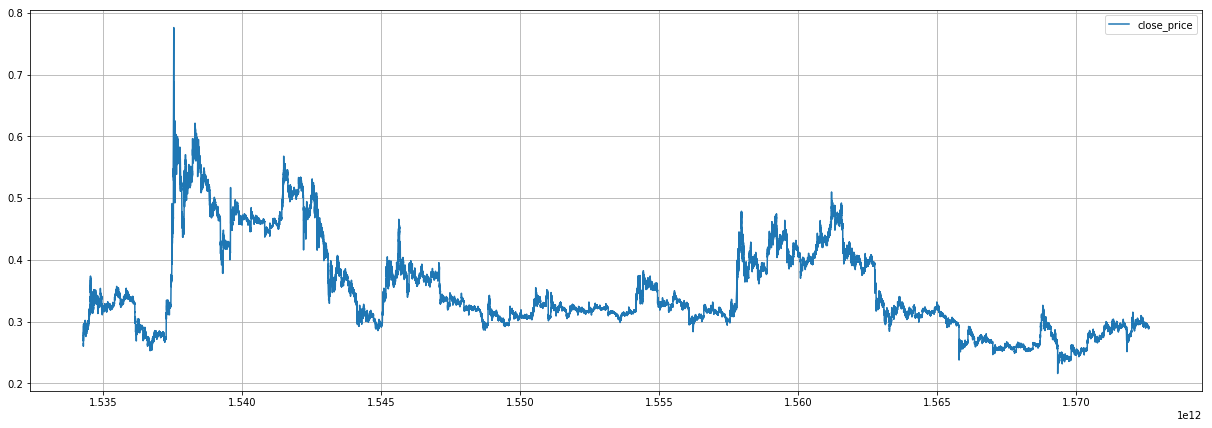

In [26]:
ploting_breakdown = XRP_Data_resample_1min_ffill.reset_index()

plt.figure(figsize= (21,7))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']
tran_y_close = ploting_breakdown['close_price']

tran_x = ploting_breakdown['timestamp_UTC_millisec']


# plt.plot(tran_x, tran_y_low, alpha = 0.1)
# plt.plot(tran_x, tran_y_high , alpha  = 0.1)

plt.plot(tran_x, tran_y_close, alpha  = 1)


# start = 45000
# dealta_t = 10000
time_section = {45000 : 13000,
                63000 : 8000 ,
                71000 : 10000,
                180000: 10000}  # start // delta_t



# plt.vlines(1534287600000, 0, 1, alpha = 1, color = 'g',linestyle = 'dashed')
    
plt.legend()
plt.grid()
print("\n selecting '2018-08-15 00:00:00' as the starting time as it bypasses the past crypto rush")

In [27]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2018-08-15 00:00:00']

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
60,2018-08-15,1534291200000,0.27279,0.2734,0.27349,0.27279,17252.63782,1.534291e+12,60000.0,1.534291e+09


In [28]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2019-08-15 00:00:00']

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
525660,2019-08-15,1565827200000,0.26373,0.26559,0.26559,0.26363,166192.961293,1.565827e+12,60000.0,1.565827e+09


## Saving Data 

In [29]:
# XRP_Data_backUp = XRP_Data_resample_1min_ffill.copy()

## Copy for testing

In [30]:
XRP_for_training =XRP_Data_resample_1min_ffill[(XRP_Data_resample_1min_ffill['timestamp_UTC'] >= 1534287600) &
                           (XRP_Data_resample_1min_ffill['timestamp_UTC'] <1565823600)].reset_index().copy()

In [31]:
XRP_for_testing =XRP_Data_resample_1min_ffill[(XRP_Data_resample_1min_ffill['timestamp_UTC'] >= 1565823600)].reset_index().copy()

In [32]:
XRP_for_testing.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
0,2019-08-14 23:00:00,1565823600000,0.27050,0.27034,0.27050,0.27032,200.000000,1.565824e+12,60000.0,1.565824e+09
1,2019-08-14 23:01:00,1565823660000,0.27034,0.27014,0.27034,0.27011,6970.610576,1.565824e+12,60000.0,1.565824e+09
2,2019-08-14 23:02:00,1565823720000,0.27015,0.27031,0.27044,0.27015,9002.533511,1.565824e+12,60000.0,1.565824e+09
3,2019-08-14 23:03:00,1565823780000,0.27028,0.27028,0.27034,0.27027,22726.951973,1.565824e+12,60000.0,1.565824e+09
4,2019-08-14 23:04:00,1565823840000,0.27015,0.26971,0.27015,0.26932,115833.923778,1.565824e+12,60000.0,1.565824e+09


## Analysis on training datasets

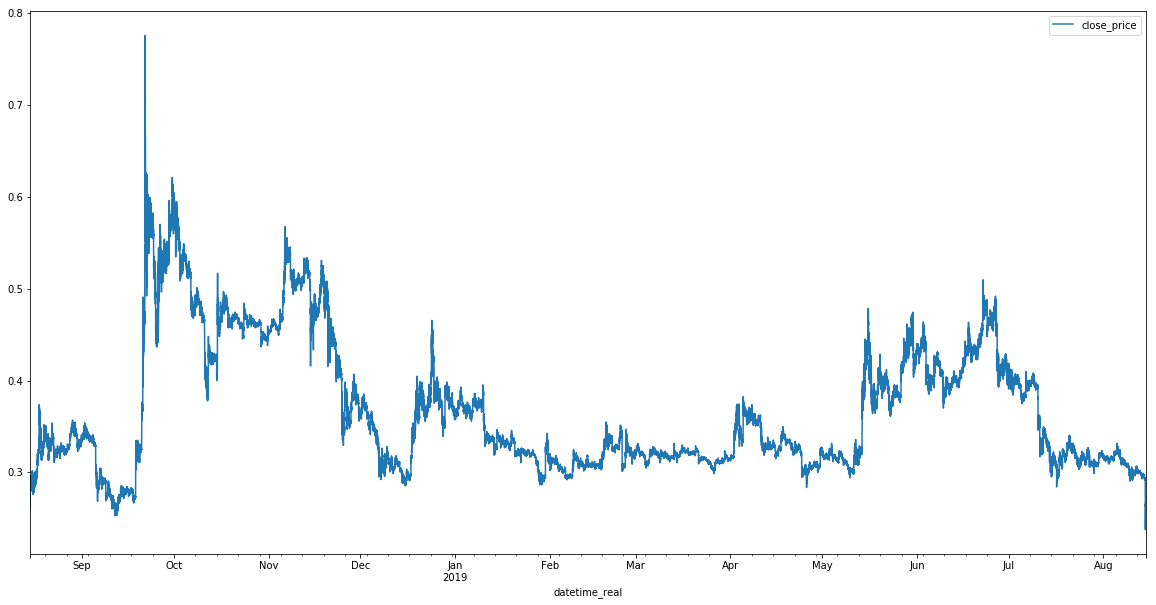

In [33]:
XRP_for_training.set_index('datetime_real')[['close_price']].plot(figsize = (20,10))

## Data mining, making own properties and features

In [34]:
section_period = {  '3min': 3,
                    '4min': 4,
                    '5min': 5,
                    '10min': 10,
                    '15min': 15,
                    '20min': 20,
                    '25min': 25,
                    '30min': 30,
                    '35min': 35,
                    '40min': 40,
                    '45min': 45,
                    '50min': 50,
                    '55min': 55,
                    '1H': 60,
                    '2H': 120,
                    '3H': 180,
                    '4H': 240,
                    '5H': 300,
                    '6H': 360,
                    '7H': 420,
                    '8H': 480,
                    '9H': 540,
                    '10H': 600,
                    '11H': 660,
                    '12H': 720,
                    '24H': 1440,
                    '2D': 2880,
                    '3D': 4320,
                    '4D': 5760,
                    '5D': 7200,
                    '10D': 14400}

In [35]:
for k,v in section_period.items():
    XRP_for_training['{0}_RA_on_Close'.format(k)] = XRP_for_training['close_price'].rolling(v).mean()

In [36]:
compare_sequence = {}

In [37]:
for col_1 in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    for col_2 in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
        temp_1 = col_1.split('_RA_on_Close')[0]
        temp_2 = col_2.split('_RA_on_Close')[0]
        if temp_1 != temp_2:
            if ((temp_1 + '_minus_' + temp_2) not in compare_sequence.keys() and (temp_2 + '_minus_' + temp_1) not in compare_sequence.keys() ):
                compare_sequence.update({temp_1 + '_minus_' + temp_2 : [col_1, col_2]})

In [38]:
for k, val in compare_sequence.items():
    XRP_for_training[k] = (XRP_for_training[val[0]] - XRP_for_training[val[1]])/XRP_for_training[val[1]] 
#     print(k, val[0], val[1])

In [39]:
for col in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    XRP_for_training[col] = XRP_for_training[col].shift(1)
    
    XRP_for_training['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_training['close_price']-XRP_for_training[col])/XRP_for_training[col] 

In [40]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_training['look_back_{}'.format(k)] = XRP_for_training['close_price'].shift(v)   # i.e. 20min ago, this is what the close price is
    XRP_for_training['look_forward_{}'.format(k)] = XRP_for_training['close_price'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_training['calculate_look_back_Percent_{}'.format(k)]    = 100*(XRP_for_training['close_price'] - XRP_for_training['look_back_{}'.format(k)])/(v)
    XRP_for_training['calculate_look_forward_Percent_{}'.format(k)] =  100*(XRP_for_training['look_forward_{}'.format(k)] - XRP_for_training['close_price'])/(v)

3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
3H 180
4H 240
5H 300
6H 360
7H 420
8H 480
9H 540
10H 600
11H 660
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400
3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
3H 180
4H 240
5H 300
6H 360
7H 420
8H 480
9H 540
10H 600
11H 660
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400


net_{net_percent}_percent is the net_percent + minimum for profit, 

i.e. net_01_percent = 0.1% + 0.003 = 0.004

In [41]:
net_01_percent = 0.004
net_02_percent = 0.007  # (for x percent, percent wrong needs to be taken into consideration)

In [42]:
Buy_in_decision = pd.DataFrame((XRP_for_training[['timestamp_UTC'] + [d for d in XRP_for_training.columns if '_forward_Percent_' in d]].set_index('timestamp_UTC') > net_02_percent).any(axis =1 )).rename(columns ={0: 'Buy_In'})

In [43]:
within_target_02_profit = XRP_for_training.merge(Buy_in_decision.reset_index(), on ='timestamp_UTC', how='left').dropna()

#### Selecting properties and becareful not to have any properties that look forward

In [44]:
[d for d in list(XRP_for_training.columns) if 'look_forward_' not in d]

['datetime_real',
 'timestamp_UTC_millisec',
 'open_price',
 'close_price',
 'highest_price',
 'lowest_price',
 'volume',
 'checking_timestamp_UTC_millisec',
 'dif',
 'timestamp_UTC',
 '3min_RA_on_Close',
 '4min_RA_on_Close',
 '5min_RA_on_Close',
 '10min_RA_on_Close',
 '15min_RA_on_Close',
 '20min_RA_on_Close',
 '25min_RA_on_Close',
 '30min_RA_on_Close',
 '35min_RA_on_Close',
 '40min_RA_on_Close',
 '45min_RA_on_Close',
 '50min_RA_on_Close',
 '55min_RA_on_Close',
 '1H_RA_on_Close',
 '2H_RA_on_Close',
 '3H_RA_on_Close',
 '4H_RA_on_Close',
 '5H_RA_on_Close',
 '6H_RA_on_Close',
 '7H_RA_on_Close',
 '8H_RA_on_Close',
 '9H_RA_on_Close',
 '10H_RA_on_Close',
 '11H_RA_on_Close',
 '12H_RA_on_Close',
 '24H_RA_on_Close',
 '2D_RA_on_Close',
 '3D_RA_on_Close',
 '4D_RA_on_Close',
 '5D_RA_on_Close',
 '10D_RA_on_Close',
 '3min_minus_4min',
 '3min_minus_5min',
 '3min_minus_10min',
 '3min_minus_15min',
 '3min_minus_20min',
 '3min_minus_25min',
 '3min_minus_30min',
 '3min_minus_35min',
 '3min_minus_40min',

In [45]:
properties = [
#     'close',
#  'date',
#  'high',
#  'low',
#  'open',
#  'quoteVolume',
 'volume',
#  'weightedAverage',
#  'datetime_real',
 '3min_close_percent_dif',
 '4min_close_percent_dif',
 '5min_close_percent_dif',
 '10min_close_percent_dif',
 '15min_close_percent_dif',
 '20min_close_percent_dif',
 '1H_close_percent_dif',
 '2H_close_percent_dif',
 '4H_close_percent_dif',
 '12H_close_percent_dif',
 '24H_close_percent_dif',
 '2D_close_percent_dif',
 '3D_close_percent_dif',
 '4D_close_percent_dif',
 '5D_close_percent_dif',
 '10D_close_percent_dif',
 'calculate_look_back_Percent_3min',
 'calculate_look_back_Percent_4min',
 'calculate_look_back_Percent_5min',
 'calculate_look_back_Percent_10min',
 'calculate_look_back_Percent_15min',
 'calculate_look_back_Percent_20min',
 'calculate_look_back_Percent_1H',
 'calculate_look_back_Percent_2H',
 'calculate_look_back_Percent_4H',
 'calculate_look_back_Percent_12H',
 'calculate_look_back_Percent_24H',
 'calculate_look_back_Percent_2D',
 'calculate_look_back_Percent_3D',
 'calculate_look_back_Percent_4D',
 'calculate_look_back_Percent_5D',
 'calculate_look_back_Percent_10D',
 '3min_minus_4min',
 '3min_minus_5min',
 '3min_minus_10min',
 '3min_minus_15min',
 '3min_minus_20min',
 '3min_minus_1H',
 '3min_minus_2H',
 '3min_minus_4H',
 '3min_minus_12H',
 '3min_minus_24H',
 '3min_minus_2D',
 '3min_minus_3D',
 '3min_minus_4D',
 '3min_minus_5D',
 '3min_minus_10D',
 '4min_minus_5min',
 '4min_minus_10min',
 '4min_minus_15min',
 '4min_minus_20min',
 '4min_minus_1H',
 '4min_minus_2H',
 '4min_minus_4H',
 '4min_minus_12H',
 '4min_minus_24H',
 '4min_minus_2D',
 '4min_minus_3D',
 '4min_minus_4D',
 '4min_minus_5D',
 '4min_minus_10D',
 '5min_minus_10min',
 '5min_minus_15min',
 '5min_minus_20min',
 '5min_minus_1H',
 '5min_minus_2H',
 '5min_minus_4H',
 '5min_minus_12H',
 '5min_minus_24H',
 '5min_minus_2D',
 '5min_minus_3D',
 '5min_minus_4D',
 '5min_minus_5D',
 '5min_minus_10D',
 '10min_minus_15min',
 '10min_minus_20min',
 '10min_minus_1H',
 '10min_minus_2H',
 '10min_minus_4H',
 '10min_minus_12H',
 '10min_minus_24H',
 '10min_minus_2D',
 '10min_minus_3D',
 '10min_minus_4D',
 '10min_minus_5D',
 '10min_minus_10D',
 '15min_minus_20min',
 '15min_minus_1H',
 '15min_minus_2H',
 '15min_minus_4H',
 '15min_minus_12H',
 '15min_minus_24H',
 '15min_minus_2D',
 '15min_minus_3D',
 '15min_minus_4D',
 '15min_minus_5D',
 '15min_minus_10D',
 '20min_minus_1H',
 '20min_minus_2H',
 '20min_minus_4H',
 '20min_minus_12H',
 '20min_minus_24H',
 '20min_minus_2D',
 '20min_minus_3D',
 '20min_minus_4D',
 '20min_minus_5D',
 '20min_minus_10D',
 '1H_minus_2H',
 '1H_minus_4H',
 '1H_minus_12H',
 '1H_minus_24H',
 '1H_minus_2D',
 '1H_minus_3D',
 '1H_minus_4D',
 '1H_minus_5D',
 '1H_minus_10D',
 '2H_minus_4H',
 '2H_minus_12H',
 '2H_minus_24H',
 '2H_minus_2D',
 '2H_minus_3D',
 '2H_minus_4D',
 '2H_minus_5D',
 '2H_minus_10D',
 '4H_minus_12H',
 '4H_minus_24H',
 '4H_minus_2D',
 '4H_minus_3D',
 '4H_minus_4D',
 '4H_minus_5D',
 '4H_minus_10D',
 '12H_minus_24H',
 '12H_minus_2D',
 '12H_minus_3D',
 '12H_minus_4D',
 '12H_minus_5D',
 '12H_minus_10D',
 '24H_minus_2D',
 '24H_minus_3D',
 '24H_minus_4D',
 '24H_minus_5D',
 '24H_minus_10D',
 '2D_minus_3D',
 '2D_minus_4D',
 '2D_minus_5D',
 '2D_minus_10D',
 '3D_minus_4D',
 '3D_minus_5D',
 '3D_minus_10D',
 '4D_minus_5D',
 '4D_minus_10D',
 '5D_minus_10D']

## split into target and properties

In [46]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os

import pydot

In [48]:
from collections import Counter

In [49]:
import math

In [50]:
target_y = within_target_02_profit[['Buy_In']].copy()

In [51]:
train_x = within_target_02_profit[properties].copy()

In [52]:
train_x.columns

Index(['volume', '3min_close_percent_dif', '4min_close_percent_dif',
       '5min_close_percent_dif', '10min_close_percent_dif',
       '15min_close_percent_dif', '20min_close_percent_dif',
       '1H_close_percent_dif', '2H_close_percent_dif', '4H_close_percent_dif',
       ...
       '2D_minus_3D', '2D_minus_4D', '2D_minus_5D', '2D_minus_10D',
       '3D_minus_4D', '3D_minus_5D', '3D_minus_10D', '4D_minus_5D',
       '4D_minus_10D', '5D_minus_10D'],
      dtype='object', length=153)

In [53]:
target_y.columns

Index(['Buy_In'], dtype='object')

In [54]:
# X_train, X_test, y_train, y_test = train_test_split(train_x, target_y, test_size=0.33, random_state=324)

In [55]:
X_train_order = train_x.iloc[:-math.floor(len(train_x)*0.2)]

In [56]:
y_train_order = target_y.iloc[:-math.floor(len(target_y)*0.2)]

In [57]:
X_test_order = train_x.iloc[-math.floor(len(train_x)*0.2):]

In [58]:
y_test_order = target_y.iloc[-math.floor(len(target_y)*0.2):]

In [59]:
buy_in_decision_classifier = DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)
buy_in_decision_classifier.fit(X_train_order, y_train_order)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [60]:
predictions = buy_in_decision_classifier.predict(X_test_order)

In [61]:
accuracy_score(y_true = y_test_order, y_pred = predictions)

0.5478073406421978

In [62]:
# for node in [2,3,4,5,6,8,10,12,15,20,25,30]:
#     for state_rand in [0,1,42,235,1995]:
#         buy_in_decision_classifier = DecisionTreeClassifier(max_leaf_nodes=node, random_state=state_rand)
#         buy_in_decision_classifier.fit(X_train_order, y_train_order)

#         predictions = buy_in_decision_classifier.predict(X_test_order)

#         print(accuracy_score(y_true = y_test_order, y_pred = predictions) , 'sate' , state_rand) 

In [63]:
#1

In [64]:
node = 8
state_rand = 0  #,1,42,235,1995]:
buy_in_decision_classifier = DecisionTreeClassifier(max_leaf_nodes=node, random_state=state_rand)
buy_in_decision_classifier.fit(X_train_order, y_train_order)

predictions = buy_in_decision_classifier.predict(X_test_order)

print(accuracy_score(y_true = y_test_order, y_pred = predictions) , 'sate' , state_rand) 

0.5478073406421978 sate 0


In [65]:
Counter(predictions)

Counter({False: 118405, True: 66211})

In [66]:
Counter(y_test_order['Buy_In'])

Counter({False: 128757, True: 55859})

In [67]:
predictions

array([False, False, False, ..., False, False, False])

In [68]:
dot_data = StringIO()
export_graphviz(buy_in_decision_classifier,
                feature_names=list(X_train_order.columns),
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [69]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [70]:
graph.write_png("tree.png")


True

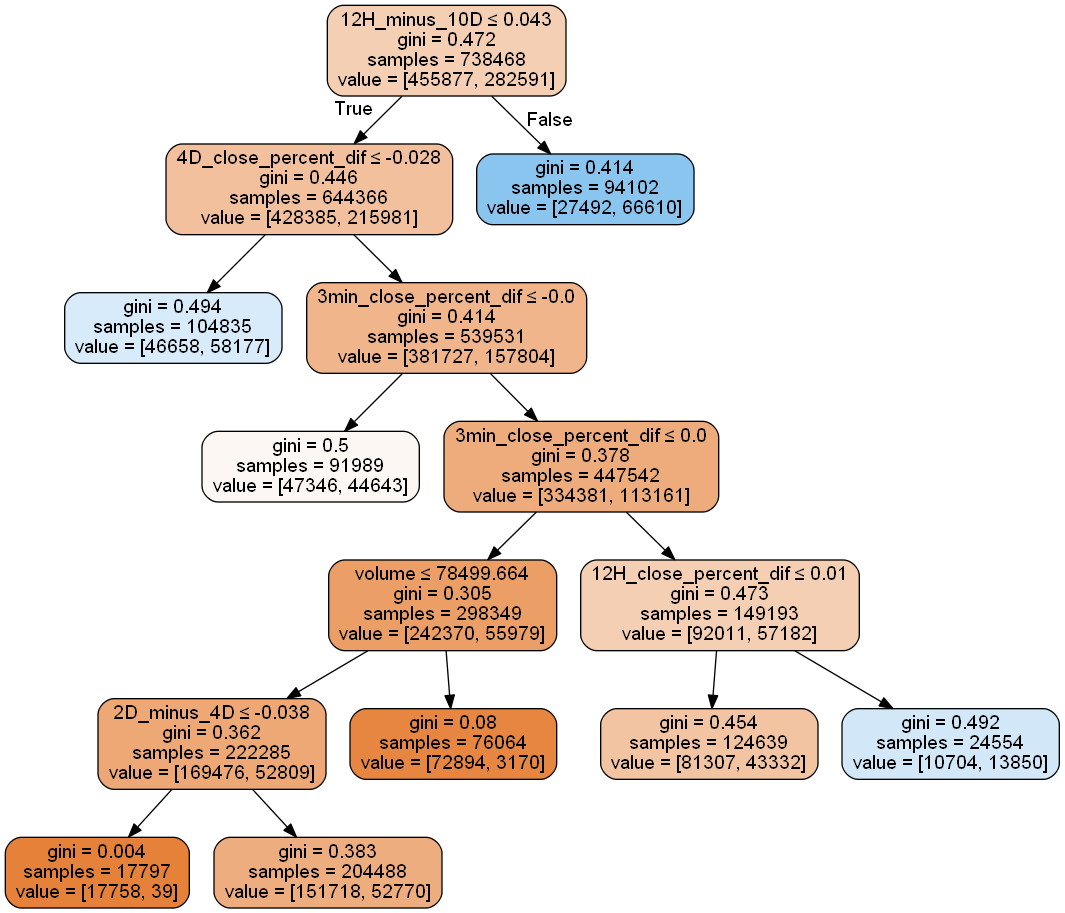

In [71]:
Image(graph.create_png())

## Testing theory

In [72]:
XRP_for_testing.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC
0,2019-08-14 23:00:00,1565823600000,0.27050,0.27034,0.27050,0.27032,200.000000,1.565824e+12,60000.0,1.565824e+09
1,2019-08-14 23:01:00,1565823660000,0.27034,0.27014,0.27034,0.27011,6970.610576,1.565824e+12,60000.0,1.565824e+09
2,2019-08-14 23:02:00,1565823720000,0.27015,0.27031,0.27044,0.27015,9002.533511,1.565824e+12,60000.0,1.565824e+09
3,2019-08-14 23:03:00,1565823780000,0.27028,0.27028,0.27034,0.27027,22726.951973,1.565824e+12,60000.0,1.565824e+09
4,2019-08-14 23:04:00,1565823840000,0.27015,0.26971,0.27015,0.26932,115833.923778,1.565824e+12,60000.0,1.565824e+09


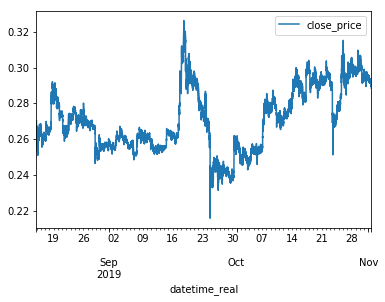

In [73]:
XRP_for_testing[['close_price','datetime_real']].set_index('datetime_real').plot()

In [74]:
section_period = {  '3min': 3,
                    '4min': 4,
                    '5min': 5,
                    '10min': 10,
                    '15min': 15,
                    '20min': 20,
                    '25min': 25,
                    '30min': 30,
                    '35min': 35,
                    '40min': 40,
                    '45min': 45,
                    '50min': 50,
                    '55min': 55,
                    '1H': 60,
                    '2H': 120,
                    '4H': 240,
                    '12H': 720,
                    '24H': 1440,
                    '2D': 2880,
                    '3D': 4320,
                    '4D': 5760,
                    '5D': 7200,
                    '10D': 14400}

In [75]:
for k,v in section_period.items():
    XRP_for_testing['{0}_RA_on_Close'.format(k)] = XRP_for_testing['close_price'].rolling(v).mean()

In [76]:
compare_sequence = {}

In [77]:
for col_1 in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
    for col_2 in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
        temp_1 = col_1.split('_RA_on_Close')[0]
        temp_2 = col_2.split('_RA_on_Close')[0]
        if temp_1 != temp_2:
            if ((temp_1 + '_minus_' + temp_2) not in compare_sequence.keys() and (temp_2 + '_minus_' + temp_1) not in compare_sequence.keys() ):
                compare_sequence.update({temp_1 + '_minus_' + temp_2 : [col_1, col_2]})

In [78]:
for k, val in compare_sequence.items():
    XRP_for_testing[k] = (XRP_for_testing[val[0]] - XRP_for_testing[val[1]])/XRP_for_testing[val[1]] 
#     print(k, val[0], val[1])

In [79]:
for col in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
    XRP_for_testing[col] = XRP_for_testing[col].shift(1)
    
    XRP_for_testing['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_testing['close_price']-XRP_for_testing[col])/XRP_for_testing[col] 

In [80]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_testing['look_back_{}'.format(k)] = XRP_for_testing['close_price'].shift(v)   # i.e. 20min ago, this is what the close price is
#     XRP_for_testing['look_forward_{}'.format(k)] = XRP_for_testing['close'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_testing['calculate_look_back_Percent_{}'.format(k)]    = 100*(XRP_for_testing['close_price'] - XRP_for_testing['look_back_{}'.format(k)])/(5*v)
#     XRP_for_testing['calculate_look_forward_Percent_{}'.format(k)] =  100*(XRP_for_testing['look_forward_{}'.format(k)] - XRP_for_testing['close'])/(5*v)

3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
4H 240
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400
3min 3
4min 4
5min 5
10min 10
15min 15
20min 20
25min 25
30min 30
35min 35
40min 40
45min 45
50min 50
55min 55
1H 60
2H 120
4H 240
12H 720
24H 1440
2D 2880
3D 4320
4D 5760
5D 7200
10D 14400


In [81]:
Counter(buy_in_decision_classifier.predict(XRP_for_testing[properties].dropna()))

Counter({True: 33337, False: 65603})

In [82]:
XRP_for_testing_drop_na = XRP_for_testing.dropna()

In [83]:
len(XRP_for_testing_drop_na)

98939

In [84]:
len(XRP_for_testing.dropna())

98939

In [85]:
### Continus increases:

In [86]:
XRP_for_testing_drop_na

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_back_Percent_1H,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_2D,calculate_look_back_Percent_3D,calculate_look_back_Percent_4D,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D
14400,2019-08-24 23:00:00,1566687600000,0.27237,0.27275,0.27291,0.27237,2000.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000583,0.000120,0.000088,0.000143,-0.000061,-4.166667e-07,0.000033,-0.000010,-0.000026,0.000003
14401,2019-08-24 23:01:00,1566687660000,0.27251,0.27271,0.27288,0.27251,1500.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000570,0.000068,0.000061,0.000142,-0.000061,-2.708333e-06,0.000032,-0.000010,-0.000027,0.000004
14402,2019-08-24 23:02:00,1566687720000,0.27265,0.27272,0.27276,0.27265,10712.152045,1.566688e+12,60000.0,1.566688e+09,...,0.000537,0.000068,0.000061,0.000146,-0.000059,-2.152778e-06,0.000032,-0.000009,-0.000027,0.000003
14403,2019-08-24 23:03:00,1566687780000,0.27272,0.27272,0.27272,0.27272,1872.912271,1.566688e+12,60000.0,1.566688e+09,...,0.000537,0.000070,0.000054,0.000159,-0.000058,-1.805556e-06,0.000032,-0.000007,-0.000027,0.000003
14404,2019-08-24 23:04:00,1566687840000,0.27272,0.27205,0.27273,0.27201,25289.351953,1.566688e+12,60000.0,1.566688e+09,...,0.000313,-0.000042,-0.000011,0.000134,-0.000066,-4.305556e-06,0.000029,-0.000009,-0.000028,0.000003
14405,2019-08-24 23:05:00,1566687900000,0.27205,0.27199,0.27216,0.27187,2307.259166,1.566688e+12,60000.0,1.566688e+09,...,0.000293,-0.000052,-0.000017,0.000133,-0.000067,-4.930556e-06,0.000029,-0.000010,-0.000029,0.000003
14406,2019-08-24 23:06:00,1566687960000,0.27199,0.27199,0.27200,0.27199,785.064316,1.566688e+12,60000.0,1.566688e+09,...,0.000293,-0.000003,-0.000017,0.000135,-0.000065,-4.930556e-06,0.000029,-0.000010,-0.000029,0.000003
14407,2019-08-24 23:07:00,1566688020000,0.27200,0.27199,0.27200,0.27199,5372.912271,1.566688e+12,60000.0,1.566688e+09,...,0.000293,0.000118,-0.000017,0.000136,-0.000065,-5.000000e-06,0.000029,-0.000011,-0.000029,0.000006
14408,2019-08-24 23:08:00,1566688080000,0.27199,0.27199,0.27199,0.27199,72.912271,1.566688e+12,60000.0,1.566688e+09,...,0.000293,0.000097,-0.000024,0.000134,-0.000065,-5.000000e-06,0.000029,-0.000011,-0.000029,0.000004
14409,2019-08-24 23:09:00,1566688140000,0.27199,0.27209,0.27228,0.27171,36239.205843,1.566688e+12,60000.0,1.566688e+09,...,0.000363,0.000087,-0.000017,0.000130,-0.000061,-4.305556e-06,0.000030,-0.000009,-0.000029,0.000004


In [87]:
XRP_for_testing_drop_na['Buy_from_decision_tree'] = buy_in_decision_classifier.predict(XRP_for_testing_drop_na[properties])

In [88]:
time_event = {}
starting_asset = 100
bought_crypto = False
over_write = False

gold_available = starting_asset 
XRP_amount = 0

stop_loss_limit = -0.02

overwrite_sell = 0.03
wait_15min_sell_activate = False

In [89]:
XRP_for_testing_drop_na.head()

,datetime_real,timestamp_UTC_millisec,open_price,close_price,highest_price,lowest_price,volume,checking_timestamp_UTC_millisec,dif,timestamp_UTC,...,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_2D,calculate_look_back_Percent_3D,calculate_look_back_Percent_4D,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
14400,2019-08-24 23:00:00,1566687600000,0.27237,0.27275,0.27291,0.27237,2000.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000120,0.000088,0.000143,-0.000061,-4.166667e-07,0.000033,-0.000010,-0.000026,0.000003,True
14401,2019-08-24 23:01:00,1566687660000,0.27251,0.27271,0.27288,0.27251,1500.000000,1.566688e+12,60000.0,1.566688e+09,...,0.000068,0.000061,0.000142,-0.000061,-2.708333e-06,0.000032,-0.000010,-0.000027,0.000004,True
14402,2019-08-24 23:02:00,1566687720000,0.27265,0.27272,0.27276,0.27265,10712.152045,1.566688e+12,60000.0,1.566688e+09,...,0.000068,0.000061,0.000146,-0.000059,-2.152778e-06,0.000032,-0.000009,-0.000027,0.000003,True
14403,2019-08-24 23:03:00,1566687780000,0.27272,0.27272,0.27272,0.27272,1872.912271,1.566688e+12,60000.0,1.566688e+09,...,0.000070,0.000054,0.000159,-0.000058,-1.805556e-06,0.000032,-0.000007,-0.000027,0.000003,False
14404,2019-08-24 23:04:00,1566687840000,0.27272,0.27205,0.27273,0.27201,25289.351953,1.566688e+12,60000.0,1.566688e+09,...,-0.000042,-0.000011,0.000134,-0.000066,-4.305556e-06,0.000029,-0.000009,-0.000028,0.000003,False


In [90]:
XRP_for_testing_drop_na[2:].head()['timestamp_UTC'].values[0]

1566687720.0

In [91]:
overwrite_track_price_10min_ago = 1566687720.0
overwrite_track_time_10min_ago = 0.27265

In [92]:
for ind, df in XRP_for_testing_drop_na[2:].iterrows():
    print(df['timestamp_UTC'])

    try:
        overwrite_track_price_10min_ago = XRP_for_testing_drop_na[XRP_for_testing_drop_na['timestamp_UTC'] == (df['timestamp_UTC'] - 600)]['timestamp_UTC'].values[0]
        overwrite_track_time_10min_ago = XRP_for_testing_drop_na[XRP_for_testing_drop_na['timestamp_UTC'] == (df['timestamp_UTC'] - 600)]['close_price'].values[0]
    except:
        None
    if bought_crypto != True: # then looking to buy at drop limit or lower
        if (overwrite_track_time_10min_ago - df['close_price'])/overwrite_track_time_10min_ago > 0.1:
            print("manual overwrite 10% sharp drop")
            
            XRP_amount += (gold_available/df['close_price']) * 0.998 # due to 0.2% fee

            gold_available -= gold_available

            time_event.update({df['timestamp_UTC']  : ( gold_available, XRP_amount , 'brought' , df['close_price'])})

            last_xrp_traction_price =  df['close_price']

            bought_crypto = True
            over_write = True
            
            over_write_time = df['timestamp_UTC']
            
            latest_bought_crypto_timestamp = df['datetime_real']
            
            print(over_write_time, over_write )
            
            
        
        
        elif df['Buy_from_decision_tree'] and over_write == False: 
            "then buy crypto"

            XRP_amount += (gold_available/df['close_price']) * 0.998 # due to 0.2% fee

            gold_available -= gold_available

            time_event.update({df['timestamp_UTC']  : ( gold_available, XRP_amount , 'brought' , df['close_price'])})

            last_xrp_traction_price =  df['close_price']

            bought_crypto = True

            latest_bought_crypto_timestamp = df['timestamp_UTC']
            #print('last_xrp_traction_price ', last_xrp_traction_price)

    else:
        if (overwrite_track_time_10min_ago - df['close_price'])/overwrite_track_time_10min_ago > 0.1: #overwrite sell
            wait_15min_sell_activate = True
            over_write_price = df['close_price']
            over_write_time = df['timestamp_UTC']
            print("overwrite")
            
        if wait_15min_sell_activate == False:
            
            if bought_crypto and over_write == False: # has crypto, either wait or sell at stoploss or profit

#                 if (df['close'] - last_xrp_traction_price ) / last_xrp_traction_price <= stop_loss_limit: # then hit stop loss, force sell

#                     #print('stoppppppppppppppppppppppppp')
#                     gold_available += XRP_amount * df['low'] * 0.998  # sell at low price

#                     XRP_amount -= XRP_amount

#                     time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})

#                     bought_crypto = False


                if df['timestamp_UTC'] - latest_bought_crypto_timestamp > 172800 * 5:

                    gold_available += XRP_amount * df['close_price'] * 0.998  # sell at low price

                    XRP_amount -= XRP_amount

                    time_event.update({df['timestamp_UTC']  : ( gold_available, XRP_amount , 'time_stop' ,  df['close_price'])})

                    bought_crypto = False


                elif (df['close_price'] - last_xrp_traction_price)/df['close_price'] >= 0.005:

                    gold_available += XRP_amount * df['close_price'] * 0.998  # sell at low price

                    XRP_amount -= XRP_amount

                    time_event.update({df['timestamp_UTC']  : ( gold_available, XRP_amount , 'sell' ,  df['close_price'])})

                    bought_crypto = False


            elif bought_crypto and over_write:
                if (df['close_price'] - last_xrp_traction_price)/df['close_price'] >= overwrite_sell:

                    gold_available += XRP_amount * df['close_price'] * 0.998  # sell at low price
                    XRP_amount -= XRP_amount

                    time_event.update({df['timestamp_UTC']  : ( gold_available, XRP_amount , 'sell_overwrite' ,  df['close_price'])})

                    bought_crypto = False
                    over_write = False


                elif df['timestamp_UTC'] - over_write_time >= 900: # 15minute overwrite times

                    gold_available += XRP_amount * df['close_price'] * 0.998  # sell at low price
                    XRP_amount -= XRP_amount

                    time_event.update({df['close_price']  : ( gold_available, XRP_amount , 'time_overwrite_pass' ,  df['close_price'])})

                    bought_crypto = False
                    over_write = False

                
                    
        else: #overwrite stop loss
            print('activate overwrite stop loss')
            if (df['close_price'] - over_write_price)/df['close_price'] >= overwrite_sell:
                
                gold_available += XRP_amount * df['close_price'] * 0.998  # sell at low price
                XRP_amount -= XRP_amount

                time_event.update({df['timestamp_UTC']  : ( gold_available, XRP_amount , 'sell_overwrite_stop_loss' ,  df['close_price'])})

                bought_crypto = False
                over_write = False
                wait_15min_sell_activate = False
                
            
            elif df['timestamp_UTC'] - over_write_time >= 900: # 15minute overwrite times

                gold_available += XRP_amount * df['close_price'] * 0.998  # sell at low price
                XRP_amount -= XRP_amount

                time_event.update({df['close_price']  : ( gold_available, XRP_amount , 'time_overwrite_pass_stop_losee' ,  df['close_price'])})

                bought_crypto = False
                over_write = False
                wait_15min_sell_activate = False
                
    clear_output()

In [93]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['datetime_real'] = [datetime.fromtimestamp(d) for d in transation_log.index]

transation_log['USD'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [94]:
transation_log[(transation_log['action'] != 'brought') & (transation_log['action'] != 'sell')]

,Gold,XRP_Amount,action,price_action_happened,datetime_real,USD
1.567644e+09,92.610792,0.0,time_stop,0.25859,2019-09-05 01:32:00,92.61
1.569352e+09,73.911092,0.0,sell_overwrite_stop_loss,0.22674,2019-09-24 20:06:00,73.91


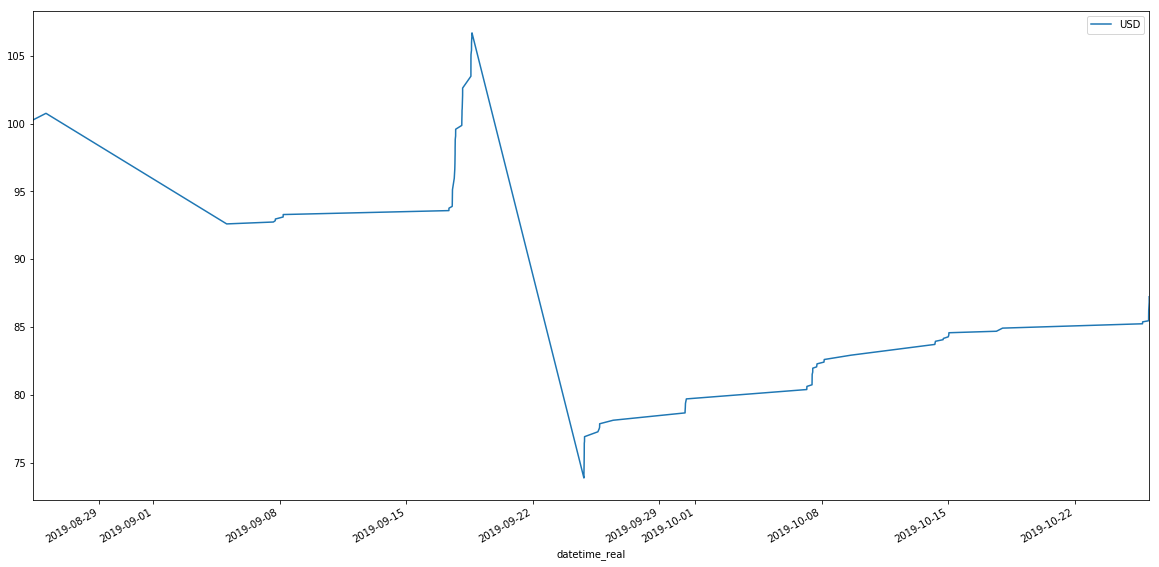

In [95]:
transation_log[transation_log['action'] != 'brought'].set_index('datetime_real')[['USD']].plot(figsize = (20,10))

## Final result visualisation

In [96]:
def plotting_view(xrp_data_input , trading_log ):

#     ploting_breakdown = XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1507374600 ) &
#                                            (XRP_Analysis_table['date'] <= 1511274300 )]


    transaction_display = trading_log
    transaction_display['time_start'] = transaction_display.index
    transaction_display['time_end'] = round(transaction_display['time_start'].shift(-1), 0)

    transaction_display['action_to_color'] = transaction_display['action'].shift(-1)

    transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'black' if x == 'stop_loss_hit' else 'blue' if x == 'time_stop' else 'g')
#     transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'o' if x == 'time_stop' else x)
    
    ploting_breakdown = xrp_data_input
    plt.figure(figsize= (20,10))


#     tran_y_low = ploting_breakdown['low']
#     tran_y_high = ploting_breakdown['high']
    tran_y_close = ploting_breakdown['close_price']

#     tran_y_ra = ploting_breakdown['20min_RA_on_Close']

    tran_x = ploting_breakdown['timestamp_UTC']


#     plt.plot(tran_x, tran_y_low)
#     plt.plot(tran_x, tran_y_high)
    plt.plot(tran_x, tran_y_close)

#     plt.plot(tran_x, tran_y_ra)

    graph_min = ploting_breakdown['close_price'].min() * 0.95
    graph_max = ploting_breakdown['close_price'].max() * 1.05

    # plotting transaction
    for ind, value in transaction_display[ (transaction_display['time_start'] <= ploting_breakdown['timestamp_UTC'].max()) &
                                           (transaction_display['time_start'] >= ploting_breakdown['timestamp_UTC'].min()) &                      
                                           (transaction_display['action'] == 'brought')].iterrows():

        plt.axvspan(value['time_start'], value['time_end'], alpha = 0.1 , facecolor = value['colour_section'])

        plt.vlines(value['time_start'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'])
        plt.vlines(value['time_end'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'], linestyle = 'dashed')


    # for ind, value in ploting_breakdown[ploting_breakdown['Increase_0.5_percent'] <= ploting_breakdown['date'].max()].iterrows():
    # #     print(value['Increase_0.5_percent'])
    # #     plt.vlines(value['date'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
    #     plt.vlines(value['Increase_0.5_percent'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')


    plt.ylim(graph_min, graph_max )

    plt.xlim(ploting_breakdown['timestamp_UTC'].min(), ploting_breakdown['timestamp_UTC'].max())
    plt.legend()

In [97]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-01 00:00:00') & 
                        (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-01 00:00:00')][['close','date']].set_index('date').plot()

KeyError: "None of [Index(['close', 'date'], dtype='object')] are in the [columns]"

In [ ]:
transation_log[(transation_log['action'] != 'brought')][['Gold','datetime_real']].set_index('datetime_real').plot()

In [ ]:
transation_log[(transation_log['datetime_real'] >= '2019-09-18 12:00:00') & 
                (transation_log['datetime_real'] <= '2019-10-01 00:00:00') & 
               (transation_log['action'] != 'brought')][['Gold','datetime_real']].set_index('datetime_real').plot()

## Deeper look

In [ ]:
transation_log[(transation_log['datetime_real'] >= '2019-09-17 12:00:00') & 
                                      (transation_log['datetime_real'] <= '2019-09-20 00:00:00')] 

In [ ]:
transation_log

In [ ]:
XRP_for_testing_drop_na.tail()

In [ ]:
plotting_view(XRP_for_testing_drop_na
              , transation_log)

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] > '2019-09-12 08:05:00') &
                        (XRP_for_testing_drop_na['datetime_real'] < '2019-09-12 09:05:00')]['close_price'].max()

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] > '2019-09-12 08:05:00') &
                        (XRP_for_testing_drop_na['datetime_real'] < '2019-09-12 09:05:00')]['close_price'].min()

In [ ]:
-(0.25192 - 0.25421)/0.25192

In [ ]:
## increase in 0.8% in 1 hour

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] > '2019-09-12 08:05:00') &
                        (XRP_for_testing_drop_na['datetime_real'] < '2019-09-12 09:05:00')].set_index('datetime_real')[['close_price']].plot(figsize =(30,20))

In [ ]:
XRP_for_testing_drop_na.set_index('datetime_real')[['close_price']].plot(figsize =(30,20))

## Saving model

In [ ]:
import pickle

In [ ]:
pkl_filename = "decision_tree_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(buy_in_decision_classifier, file)

In [ ]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [ ]:
import sqlite3

In [ ]:
conn  = sqlite3.connect('D:\\Database\\XRP_Bitfinex.db')

In [ ]:
c = conn.cursor()

In [ ]:
c.execute("Select * from XRP_USD_Pair")

In [ ]:
final_test  = c.fetchall()

In [ ]:
final_test_df = pd.DataFrame(final_test)

In [ ]:
final_test_df.columns = ['Pair',
'Time',
'BID', 
'BID_SIZE', 
'ASK', 
'ASK_SIZE', 
'DAILY_CHANGE', 
'DAILY_CHANGE_RELATIVE', 
'LAST_PRICE', 
'VOLUME', 
'HIGH', 
'LOW']

In [ ]:
final_test_df['LAST_PRICE'] = pd.to_numeric(final_test_df['LAST_PRICE'])

In [ ]:
final_test_df

In [ ]:
table_5min = XRP_Data[(XRP_Data['datetime_real'] >= '2019-11-29 20:06:59')  & (XRP_Data['datetime_real'] <= '2019-11-29 22:16:20')][['datetime_real','close']].set_index('datetime_real')

In [ ]:
table_30s = final_test_df[['Time','LAST_PRICE']].set_index('Time')

In [ ]:
table_5min.head()

In [ ]:
concating = pd.concat([table_5min,table_30s ]).reset_index()

In [ ]:
concating = concating.sort_values(by = 'index')

In [ ]:
concating

In [ ]:
half_min_price = concating['LAST_PRICE']
five_min_price = concating['close']
timing = concating['index']

In [ ]:
plt.figure(figsize= (20,10))
plt.plot(timing,half_min_price )

plt.scatter(timing,five_min_price )
plt.show()

#### Catch "step-downs" and "sharp-drops"

In [ ]:
mark:
    
# for_plotting_visual = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:00:00')]
                        
    
# for_plotting_visual_2 = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-10-23 10:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-23 20:00:00')]
                        

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:40:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:05:00')]

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-10-23 13:00:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-23 14:00:00')]

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-10-23 13:00:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-10-23 14:00:00')]

In [ ]:
(0.287198 - 0.273536)/0.287198

In [ ]:
plt.figure(figsize= (20,10))

# for_plotting_visual = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:00:00')]
                        
# for_plotting_visual_2 = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
#                                       (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 22:00:00')]

for_plotting_visual = XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:40:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 20:05:00')]

tran_x = for_plotting_visual['datetime_real']
# tran_y_close = for_plotting_visual['close']


tran_x_2 = for_plotting_visual['datetime_real']
tran_y_2_close = for_plotting_visual['close']


plt.plot(tran_x_2, tran_y_2_close)
# plt.plot(tran_x, tran_y_close)



#### 

In [ ]:
XRP_for_testing_drop_na[(XRP_for_testing_drop_na['datetime_real'] >= '2019-09-24 19:00:00') & 
                                      (XRP_for_testing_drop_na['datetime_real'] <= '2019-09-24 22:00:00')]


# Draft Paper

### Static trading

In [ ]:
time_event = {}
starting_asset = 100
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.02
sell_limit = 0.005

trading_data = XRP_for_testing_drop_na
while gold_available >= 0:
    
    for ind, df in trading_data.iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if (( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= drop_limit ) and (df['20min_RA_on_Close'] != df['2H_RA_on_Close']): 
                "then buy crypto"

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
                latest_bought_crypto_timestamp = df['date']
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )

                if df['date'] - latest_bought_crypto_timestamp > 172800:
                    
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' ,  df['low'])})
                    
                    bought_crypto = False
                    
                
                elif ( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [ ]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['datetime_real'] = [datetime.fromtimestamp(d) for d in transation_log.index]

transation_log['Gold'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [ ]:
transation_log[transation_log['action'] != 'brought'].set_index('datetime_real')[['Gold']].plot(figsize = (20,10))

In [ ]:
transation_log

# identify sharp drop bounce back

In [ ]:
XRP_for_testing_drop_na.tail(1000).set_index('date')[['close']].plot(figsize = (20,10))